# Spaceship Titanic

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

The task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help make these predictions, a set of personal records are recovered from the ship's damaged computer system.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
space = pd.read_csv('train.csv')

In [4]:
space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Field Descriptions
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
space.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

** Working on cleaning the data **

Dropping the name column since each person has a Passenger Id

In [7]:
space['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
space.drop('Name', axis=1, inplace=True)

In [9]:
space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [10]:
space[space['CryoSleep'] == True].isnull().sum()

PassengerId      0
HomePlanet      75
CryoSleep        0
Cabin           84
Destination     48
Age             82
VIP             75
RoomService     68
FoodCourt       70
ShoppingMall    96
Spa             65
VRDeck          62
Transported      0
dtype: int64

If a person was put to sleep, then they cannot have bills spent in any of the luxury amenities(e.g RoomService, FoodCourt etc)

Filling the null values of the luxury amenities of passengers put to sleep with 0

In [11]:
def fill_luxury(col):
    cryo = col[0]
    luxury = col[1]
    
    if cryo == True:
        return 0
    else:
        return luxury

In [12]:
space['RoomService'] = space[['CryoSleep', 'RoomService']].apply(fill_luxury, axis=1)

In [13]:
space[space['CryoSleep'] == True].isnull().sum()

PassengerId      0
HomePlanet      75
CryoSleep        0
Cabin           84
Destination     48
Age             82
VIP             75
RoomService      0
FoodCourt       70
ShoppingMall    96
Spa             65
VRDeck          62
Transported      0
dtype: int64

In [14]:
space['FoodCourt'] = space[['CryoSleep', 'FoodCourt']].apply(fill_luxury, axis=1)
space['ShoppingMall'] = space[['CryoSleep', 'ShoppingMall']].apply(fill_luxury, axis=1)
space['Spa'] = space[['CryoSleep', 'Spa']].apply(fill_luxury, axis=1)
space['VRDeck'] = space[['CryoSleep', 'VRDeck']].apply(fill_luxury, axis=1)

In [15]:
space[space['CryoSleep'] == True].isnull().sum()

PassengerId      0
HomePlanet      75
CryoSleep        0
Cabin           84
Destination     48
Age             82
VIP             75
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
dtype: int64

In [16]:
space.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
dtype: int64

In [17]:
space['HomePlanet'] = space['HomePlanet'].fillna('Earth')

In [18]:
space.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
dtype: int64

In [20]:
space['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [23]:
space.drop('Cabin', axis=1, inplace=True)

In [24]:
space.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [25]:
space.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
dtype: int64

In [26]:
space['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [27]:
space['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [28]:
space.groupby('HomePlanet')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
HomePlanet,,,,,,,,
Earth,4713.0,26.183323,14.333477,0.0,18.0,24.0,35.0,79.0
Europa,2085.0,34.419664,13.089347,0.0,26.0,33.0,43.0,79.0
Mars,1716.0,29.297203,14.558386,0.0,20.0,28.0,38.0,76.0


In [29]:
def impute_age(col):
    planet = col[0]
    age = col[1]
    
    if pd.isnull(age):
        
        if planet == 'Earth':
            return 24
        elif planet == 'Europa':
            return 33
        else:
            return 28
    else:
        return age

# def fill_luxury(col):
#     cryo = col[0]
#     luxury = col[1]
    
#     if cryo == True:
#         return 0
#     else:
#         return luxury
        
        

In [30]:
space['Age'] = space[['HomePlanet', 'Age']].apply(impute_age, axis=1)

In [31]:
space.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
dtype: int64

** Checking to see if the number of null values of CryoSleep passengers who did not spend at any luxury amenities **

** Filling the null values of passengers in CryoSleep with True **

In [32]:
space[(space['RoomService'] == 0) & (space['FoodCourt'] == 0) & 
      (space['ShoppingMall'] == 0) & (space['Spa'] == 0) & 
      (space['VRDeck'] == 0)]['CryoSleep'].isnull().sum()

87

In [33]:
def fill_cryo(col):
    cryo = col[0]
    amenities = col[1:]
    
    if pd.isnull(cryo):
        
        if set(amenities) == {0}:
            return True
    else:
        return cryo
    
    
    

In [34]:
space['CryoSleep'] = space[['CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].apply(
    fill_cryo, axis=1)

In [35]:
space.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       130
Destination     182
Age               0
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
dtype: int64

In [36]:
space.groupby(['HomePlanet', 'Destination']).count()

PassengerId  CryoSleep   Age   VIP  RoomService  \
HomePlanet Destination                                                      
Earth      55 Cancri e            721        711   721   698          716   
           PSO J318.5-22          728        718   728   708          720   
           TRAPPIST-1e           3251       3197  3251  3180         3193   
Europa     55 Cancri e            886        872   886   870          879   
           PSO J318.5-22           19         19    19    19           18   
           TRAPPIST-1e           1189       1172  1189  1163         1177   
Mars       55 Cancri e            193        190   193   189          190   
           PSO J318.5-22           49         48    49    47           47   
           TRAPPIST-1e           1475       1456  1475  1438         1459   

                          FoodCourt  ShoppingMall   Spa  VRDeck  Transported  
HomePlanet Destination                                                        
Earth      55 Cancri e          707           712   710     708          721  
           PSO J318.5-22        720           721   719     720          728  
           TRAPPIST-1e         3201          3208  3196    3191         3251  
Europa     55 Cancri e          880           877   876     876          886  
           PSO J318.5-22         18            19    19      19           19  
           TRAPPIST-1e         1178          1171  1177    1178         1189  
Mars       55 Cancri e          191           186   193     191          193  
           PSO J318.5-22         49            49    48      48           49  
           TRAPPIST-1e         1459          1459  1458    1455         1475

** Most people seem to travel to TRAPPIST-1E **

** Filling the null values of Destination with 'TRAPPIST-1e' **

In [37]:
space['Destination'] = space['Destination'].fillna('TRAPPIST-1e')

In [38]:
space.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       130
Destination       0
Age               0
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
dtype: int64

** Filling null VIP values with the mode ** 

In [39]:
space['VIP'] = space['VIP'].fillna(space['VIP'].mode()[0])

In [40]:
space.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       130
Destination       0
Age               0
VIP               0
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
dtype: int64

In [41]:
space.groupby(['CryoSleep', 'VIP']).count()

PassengerId  HomePlanet  Destination   Age  RoomService  \
CryoSleep VIP                                                              
False     False         5264        5264         5264  5264         5157   
          True           175         175          175   175          171   
True      False         3103        3103         3103  3103         3103   
          True            21          21           21    21           21   

                 FoodCourt  ShoppingMall   Spa  VRDeck  Transported  
CryoSleep VIP                                                        
False     False       5158          5165  5152    5148         5264  
          True         171           170   174     172          175  
True      False       3103          3103  3103    3103         3103  
          True          21            21    21      21           21

** filling null CryoSleep values with the mode **

In [42]:
space['CryoSleep'] = space['CryoSleep'].fillna(space['CryoSleep'].mode()[0])

In [43]:
space.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
dtype: int64

** Filling null values of luxury amenities with 0 **

In [44]:
space.fillna(0, inplace=True)

In [45]:
space.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

 Now the data is all cleaned up
 
 Exploring the data with visualizations

In [46]:
space.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


<AxesSubplot:>

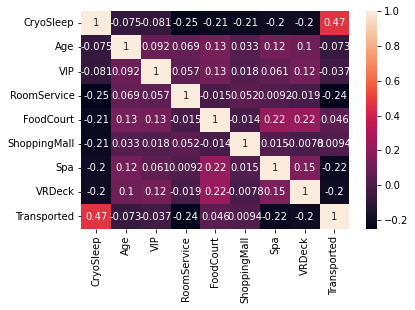

In [47]:
sns.heatmap(space.corr(), annot=True)

CryoSleep has a higher correlation with Transported than other columns

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

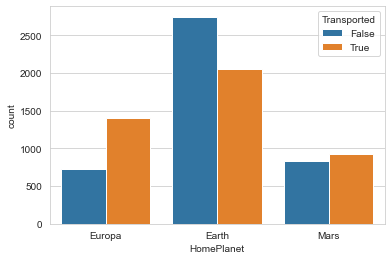

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='HomePlanet', data=space, hue='Transported')

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

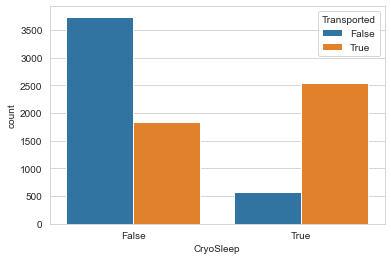

In [49]:
sns.countplot(x='CryoSleep', data=space, hue='Transported')

A high percentage of people who were put to sleep were transported to the other dimension

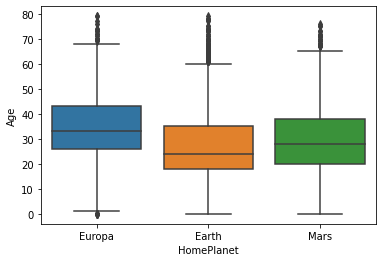

In [21]:
sns.boxplot(x='HomePlanet', y='Age', data=space)
plt.show()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='Destination', ylabel='count'>

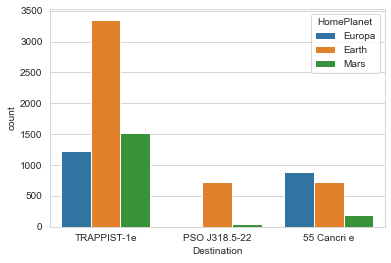

In [51]:
sns.countplot(x='Destination', data=space, hue='HomePlanet')

<AxesSubplot:xlabel='Destination', ylabel='count'>

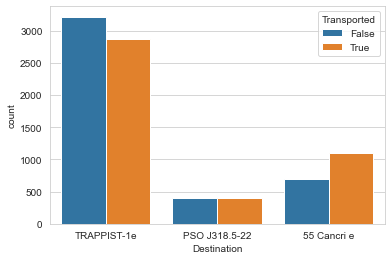

In [52]:
sns.countplot(x='Destination', data=space, hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='Age'>

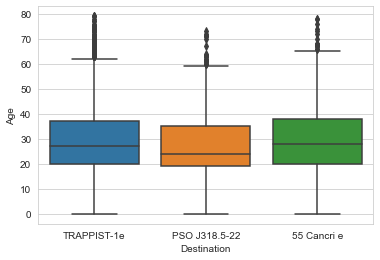

In [53]:
sns.boxplot(x='Destination', y='Age', data=space)

** Preparing the data in a way a machine learning model will accept it**

** Getting dummy variables for all the categorical columns**

In [54]:
space_feat = pd.get_dummies(space.drop('PassengerId', axis=1), drop_first=True)

In [55]:
space_feat.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [56]:
dict_map = {True: 1,
           False: 0}

In [57]:
space_feat['CryoSleep'] = space_feat['CryoSleep'].map(dict_map)
space_feat['VIP'] = space_feat['VIP'].map(dict_map)
space_feat['Transported'] = space_feat['Transported'].map(dict_map)

In [58]:
space_feat.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1


** The data is in the correct form **

**Doing a Random Forest model first**

In [59]:
# Spliting the data into training and testing 
from sklearn.model_selection import train_test_split

In [60]:
X = space_feat.drop('Transported', axis=1)
y = space_feat['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [61]:
# Loading the model from skicit learn
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Creating an instance and fitting the training data
rfc = RandomForestClassifier().fit(X_train, y_train)

In [63]:
rfc_pred = rfc.predict(X_test)

**Checking to see how well Random Forest Classifier Performs**

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
print(confusion_matrix(y_test, rfc_pred))
print()
print(classification_report(y_test, rfc_pred))

[[1035  264]
 [ 289 1020]]

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1299
           1       0.79      0.78      0.79      1309

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



Trying to change the number of estimators(decision trees) to see if the model improves on accuracy

In [66]:
# from sklearn.model_selection import GridSearchCV

# n_estimators=[100,200,300,400,500,600]
# max_features= [2,3,4]
# bootstrap = [True,False]
# oob_score = [True,False]

# param_grid = {'n_estimators':n_estimators,
#              'max_features':max_features,
#              'bootstrap':bootstrap,
#              'oob_score':oob_score}

# rfc = RandomForestClassifier()
# grid = GridSearchCV(rfc,param_grid)

In [67]:
# grid.fit(X_train, y_train)

**Cleaning the test data as the training data**

In [68]:
test_data = pd.read_csv('test.csv')

In [69]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [71]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [72]:
test_data['CryoSleep'] = test_data[['CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].apply(
    fill_cryo, axis=1)

In [73]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        57
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [74]:
test_data.drop('Name', axis=1, inplace=True)

In [91]:
test_data.drop('Cabin', axis=1, inplace=True)

In [92]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [93]:
test_data['HomePlanet'] = test_data['HomePlanet'].fillna('Earth')

In [94]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [95]:
test_data['Destination'] = test_data['Destination'].fillna('TRAPPIST-1e')

In [96]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [97]:
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(space['CryoSleep'].mode()[0])
test_data['Age'] = test_data[['HomePlanet', 'Age']].apply(impute_age, axis=1)

In [98]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [99]:
test_data['VIP'] = test_data['VIP'].fillna(test_data['VIP'].mode()[0])

In [100]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [101]:
test_data.fillna(0, inplace=True)

In [102]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

**Transforming the data into numerical columns**

In [103]:
test_feat = pd.get_dummies(test_data.drop('PassengerId', axis=1), drop_first=True)

In [104]:
test_feat.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,0,0,0,1
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,0,0,1
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,0,0,0,1


In [105]:
for col in ['CryoSleep', 'VIP']:
    test_feat[col] = test_feat[col].map(dict_map)

In [106]:
test_feat.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0,0,0,1


**Getting the test predictions using Random Forests**

In [107]:
rfc_test_pred = rfc.predict(test_feat)

In [108]:
rfc_test_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
ss = pd.DataFrame()